## 1. Load the cleaned data

In [2]:
# 1. Setup
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Add project root to Python path (if needed)
sys.path.append(os.path.abspath('../src'))  # assumes data_loader.py is in ../scripts

# 3. Import loader
from data_loader import load_fraud_data
from preprocessing import clean_fraud_data

# Plotting style
sns.set(style='whitegrid')

# 4. Load and Clean Data
# Load raw data
raw_data_path = '../data/raw/Fraud_Data.csv'
fraud_df_raw = load_fraud_data(raw_data_path)

# Clean data using the preprocessing module
fraud_df = clean_fraud_data(fraud_df_raw)

Loaded Fraud Data: (151112, 11) rows, columns: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']


## 2. Data overview

In [3]:
print(fraud_df.shape)
print(fraud_df.columns)
fraud_df.info()
fraud_df.head()

(151112, 11)
Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  int64         
 10  class           151112 non-null  int64         
dtypes: datetime64

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0


## 3. Basic statistics and missing values

In [4]:
fraud_df.describe(include='all').T

# Missing values count
fraud_df.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

## 4. Target variable analysis (class)

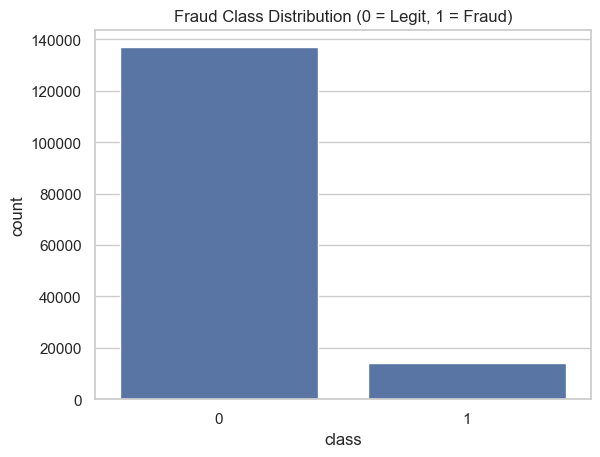

In [5]:
sns.countplot(x='class', data=fraud_df)
plt.title('Fraud Class Distribution (0 = Legit, 1 = Fraud)')
plt.savefig('../figures/fraud_class_distribution.png')
plt.show()

## 5. Univariate analysis of key features

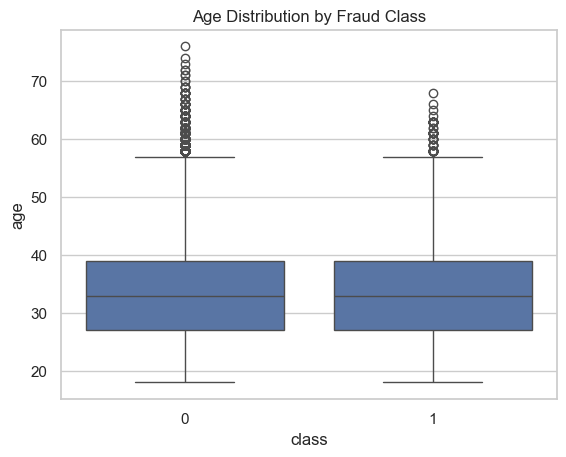

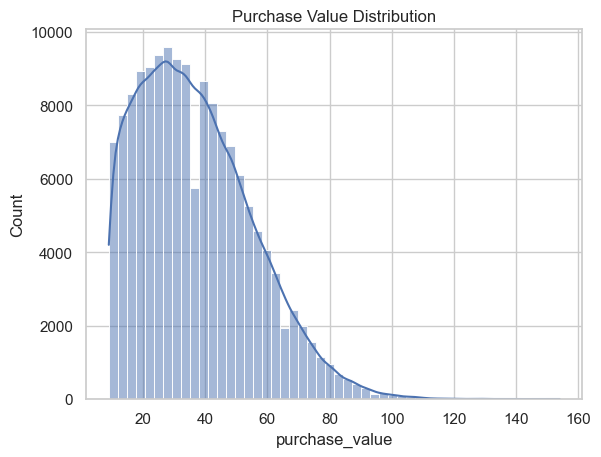

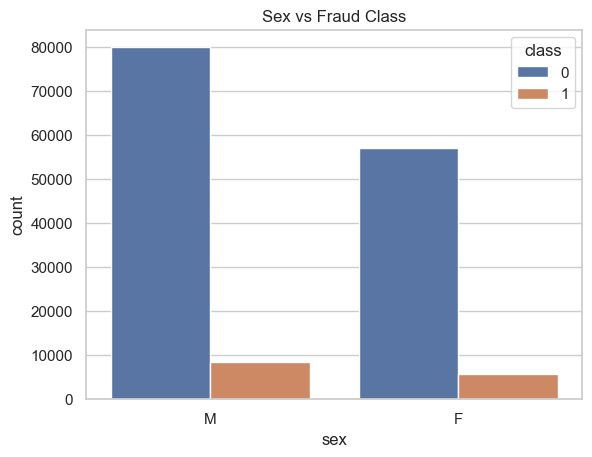

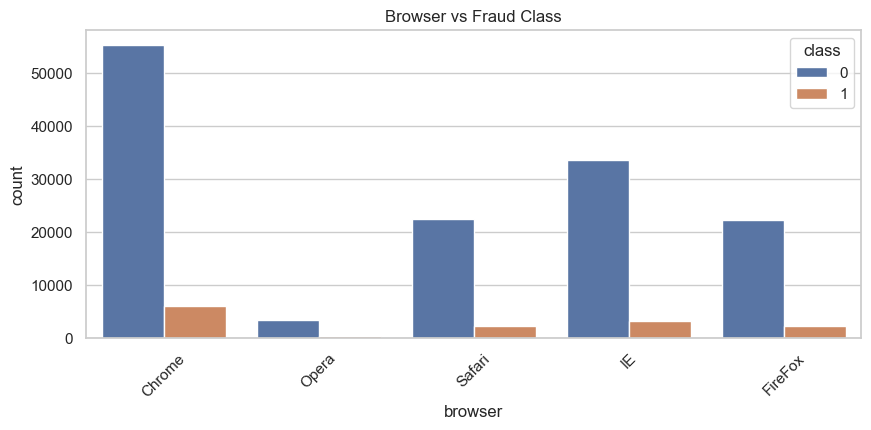

In [6]:
# Age distribution by fraud class
sns.boxplot(x='class', y='age', data=fraud_df)
plt.title('Age Distribution by Fraud Class')
plt.show()

# Purchase value distribution
sns.histplot(fraud_df['purchase_value'], bins=50, kde=True)
plt.title('Purchase Value Distribution')
plt.show()

# Sex distribution
sns.countplot(x='sex', hue='class', data=fraud_df)
plt.title('Sex vs Fraud Class')
plt.show()

# Browser counts
plt.figure(figsize=(10,4))
sns.countplot(x='browser', hue='class', data=fraud_df)
plt.title('Browser vs Fraud Class')
plt.xticks(rotation=45)
plt.show()

## 6. Bivariate analysis

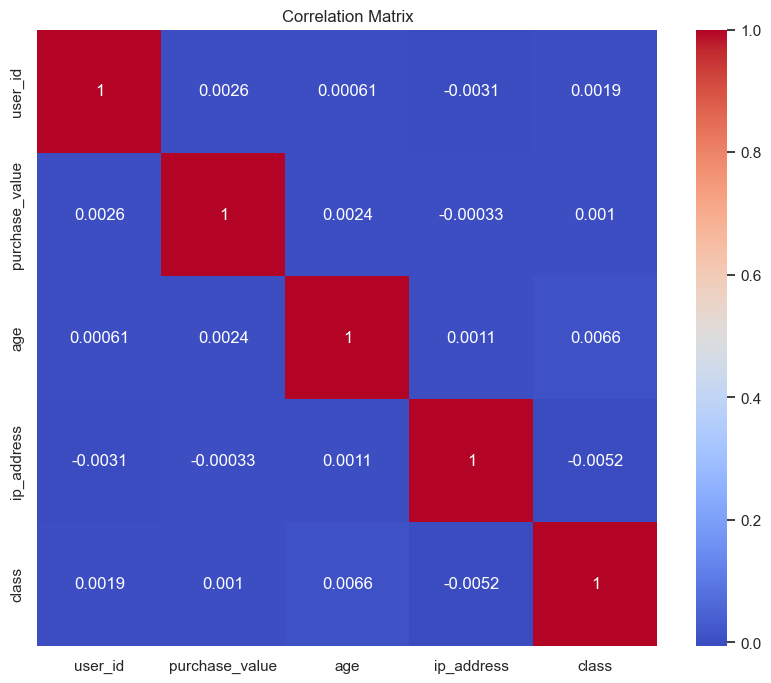

In [7]:
# Select only numeric columns
numeric_df = fraud_df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## 7. Time-based features analysis

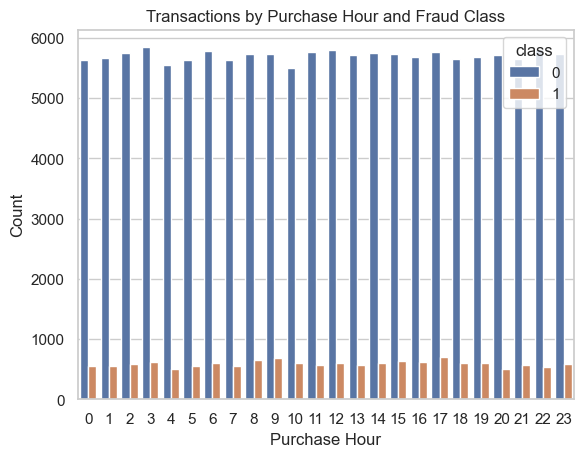

In [8]:
#Extract feature temporarily during EDA
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# Create temporary column for plotting
fraud_df['purchase_hour'] = fraud_df['purchase_time'].dt.hour

sns.countplot(x='purchase_hour', hue='class', data=fraud_df)
plt.title('Transactions by Purchase Hour and Fraud Class')
plt.xlabel('Purchase Hour')
plt.ylabel('Count')
plt.show()

## 8. Geolocation Analysis

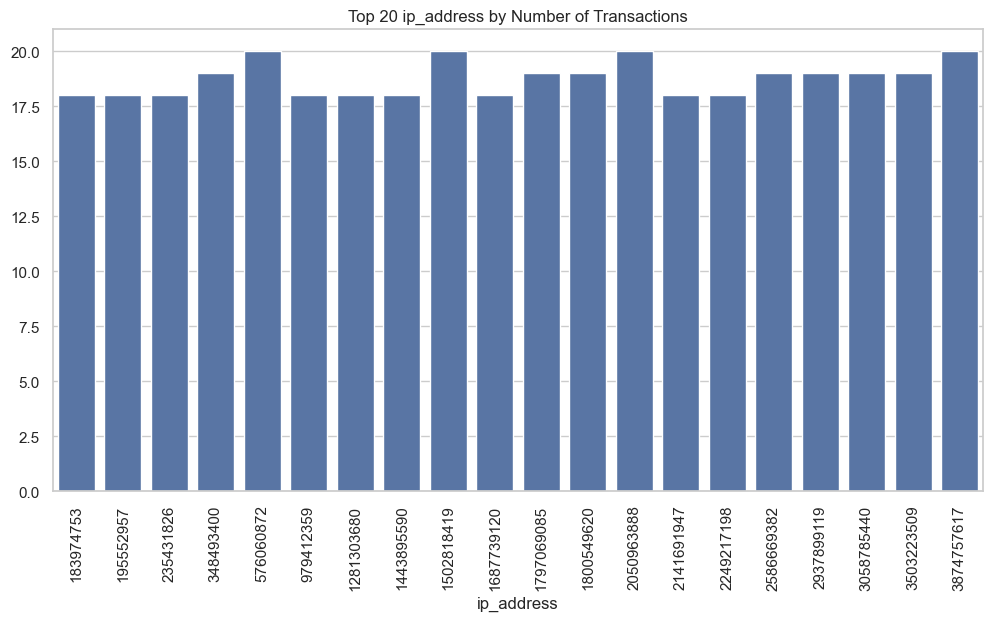

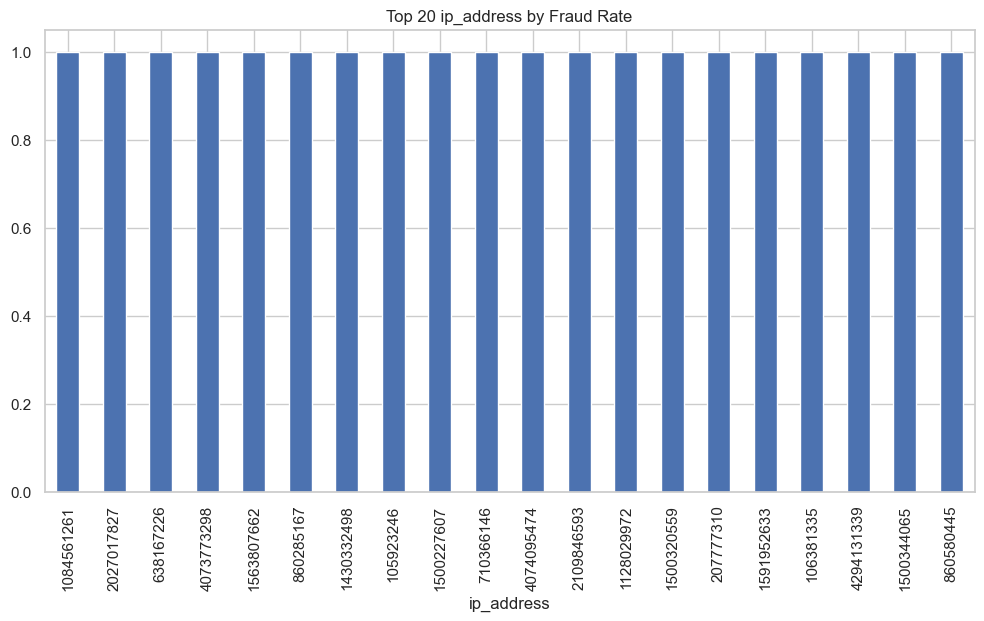

In [9]:
# convet ip_address to numeric
fraud_df['ip_address'] = fraud_df['ip_address'].astype(int)


plt.figure(figsize=(12,6))
country_counts = fraud_df['ip_address'].value_counts().head(20)
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xticks(rotation=90)
plt.title('Top 20 ip_address by Number of Transactions')
plt.show()

# Fraud rate by country
fraud_rate_by_country = fraud_df.groupby('ip_address')['class'].mean().sort_values(ascending=False).head(20)
fraud_rate_by_country.plot(kind='bar', figsize=(12,6))
plt.title('Top 20 ip_address by Fraud Rate')
plt.show()